In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [ ]:
# atrinkti 10 populiariausių gamintojų iš autopliuslt,
# pateikti tokius stulpelius - gamintojas, vidutinė kaina, vidutinė rida, vidutinis amžius, modelių kiekis.
# Gautus rezultatus surašyti į SQLite duomebazę, pavadinimu "Testas.db",
# lentelės pavadinimas kokį sugalvosite. Viską turi atlikti python kodas.
# PANDAS NEGALIMA NAUDOTI, viską atlikite per cursor() objektus.

In [2]:
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [3]:
sql="""
select gamintojas, count(*) as kiekis,
round(avg(cast(replace(price, ' ', '') as float))) as kaina,
round(avg(cast(replace(replace(rida, ' ', ''), 'km', '') as float))) as rida,
round(avg(2024-cast(substring(pagaminimo_data, 1, 4) as float)), 2) as amzius
from autopliuslt
where rida != 'Nenurodyta'
group by gamintojas
order by kiekis desc
limit 10;
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kiekis, kaina, rida, amzius = list(map(list, zip(*ans)))
#? = np.transpose(ans)




In [8]:
SDB = sqlite3.connect('Testas.db')  # jei neegzistuoja db , bus sukurta nauja db
Cs = SDB.cursor()

#  if not exists - tikrina ar jau sukurta DB
sql = '''create table if not exists autopliuslt
(
gamintojas text not null,
kiekis numeric not null,
kaina numeric not null,
rida numeric not null,
amzius numeric not null
)
'''
Cs.execute(sql)

sql_template = '''insert into autopliuslt values (?,?,?,?,?)'''
# data = [gamintojas, kiekis, kaina, rida, amzius]
Cs.executemany(sql_template, ans)



SDB.commit() # commit() butinas jei norim irasyti duomenis i DB

SDB.close()

In [ ]:
failas = ''
df = pd.read_json(failas)

df['dataLaikas'] = pd.to_datetime(df['dataLaikas'])

In [9]:
# pandas ir JSON:

#  https://data.gov.lt/datasets/509/

# nuskaitykite JSON failą -  2023 metus



df = pd.read_json('../../DATA/ei_2023_12_31.json')
df.head(2)

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-23-9588945,2023-01-01 00:27,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,None,1,40.0,Ne,Ne,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ..."
1,07-23-9588946,2023-01-01 00:10,2023-01-01 01:04,2023-01-01 02:50,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Atsitrenkimas į galą,2,0,...,None,1,50.0,Taip,Ne,Ne,6178087.0,336529.0,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...","[{'tpId': 33416867, 'regValstybe': 'Lietuva', ..."


In [11]:
# konvertuokite dataLaikas stulpelį į datetime
#  pd.to_datetime(df[stulpelis])
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'])
df.head(2)

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-23-9588945,2023-01-01 00:27:00,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,None,1,40.0,Ne,Ne,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ..."
1,07-23-9588946,2023-01-01 00:10:00,2023-01-01 01:04,2023-01-01 02:50,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Atsitrenkimas į galą,2,0,...,None,1,50.0,Taip,Ne,Ne,6178087.0,336529.0,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...","[{'tpId': 33416867, 'regValstybe': 'Lietuva', ..."


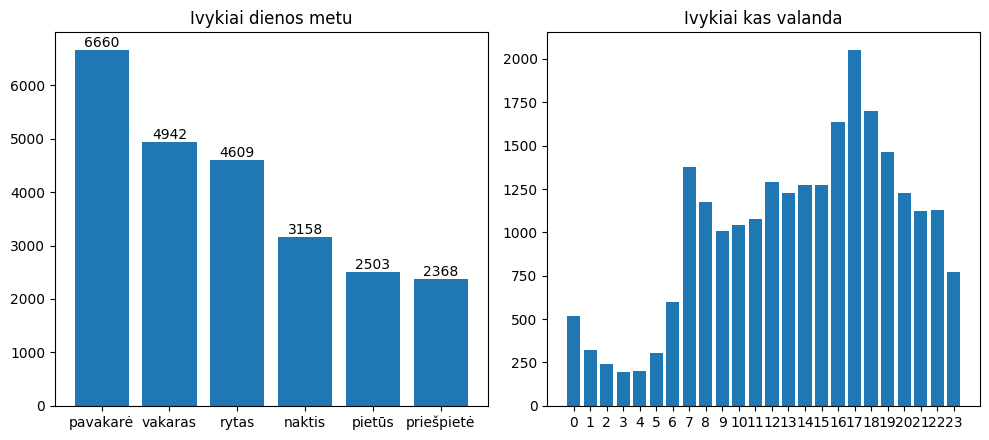

In [17]:
# pridėkite naują stulpelį su paros laikais (rytas, vakaras ...)
# pridėkite naują stulplelį, kur būtų tik įvykio valanda
# Vizualizuokite, kuriuo paros laiku, kurią valandą įvyksta daugiausiai eismo įvykių

def f(x):
    if 0<=x<=6 or x>=23:
        return 'naktis'
    elif 7<=x<=10:
        return 'rytas'
    elif 11<=x<=12:
        return 'priešpietė'
    elif 13<=x<=14:
        return 'pietūs'
    elif 15<=x<=18:
        return 'pavakarė'
    elif 19<=x<=22:
        return 'vakaras'
    
df['V'] = df['dataLaikas'].dt.hour
df['metas'] = df['V'].apply(f)

metas = df['metas'].value_counts()
valandos = df['V'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

B1 = ax1.bar(metas.index, metas.values)
ax1.bar_label(B1)
ax1.set_title('Ivykiai dienos metu')

B2 = ax2.bar(valandos.index, valandos.values)
ax2.set_xticks(valandos.index)
ax2.set_title('Ivykiai kas valanda') 


plt.tight_layout()
plt.show()

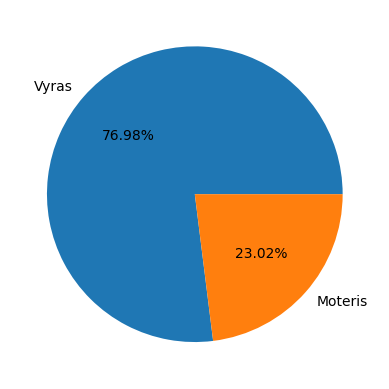

In [120]:
# sekantiems klausimams patys sugalvojate tinkamiausias vizualizacijas
# Vyrų ar moterų buvo daugiau, sukėlusių eismo įvykį? (stulpelis eismoEalyviai)
#  koks vidutinis kaltininkų amžius?
# Kokiomis baudų rūšimis buvo nubausti vyrai/moterys (administracinė, baudžiamoji) (teisenosStadijaBusena)

# https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots


df['eismoDalyviai'][0][0]['kaltininkas']

# def amzius(x):
#     for i in x:
#         if i['kaltininkas'] == 'Taip':
#             return i['amzius']


# motSkaicius=0
# vyrSkaicius=0
# for i in df['eismoDalyviai']:
#     for j in i:
#         if j['kaltininkas']== 'Taip':
#             if j['lytis'] == 'Vyras':
#                 vyrSkaicius = vyrSkaicius+1
#             if j['lytis']== 'Moteris':
#                 motSkaicius = motSkaicius+1
# print(motSkaicius)
# print(vyrSkaicius)


def set_lytis(x):
    if len(x) > 0:
       for i in x:
           if i['kaltininkas'] == 'Taip':
               return i['lytis']
           
        
        
df['kaltLytis'] = df['eismoDalyviai'].apply(set_lytis)

c = df[df['kaltLytis'] != None]['kaltLytis'].value_counts()

fig, ax = plt.subplots()

ax.pie(c.values, labels=c.index, autopct='%.2f%%')

plt.show()




In [127]:
df['eismoDalyviai'][0][0]['amzius']

def set_amz(x):
    if len(x) > 0:
       for i in x:
           if i['kaltininkas'] == 'Taip':
               return i['amzius']
           
df['amz'] = df['eismoDalyviai'].apply(set_amz)
amz_vid = df['amz'].mean(numeric_only=True)
print(f'kaltininku amziaus vidurkis {amz_vid:.2f}')

kaltininku amziaus vidurkis 42.70
